In [22]:
import pandas as pd

# Load the dataset
file_path = 'wine.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  

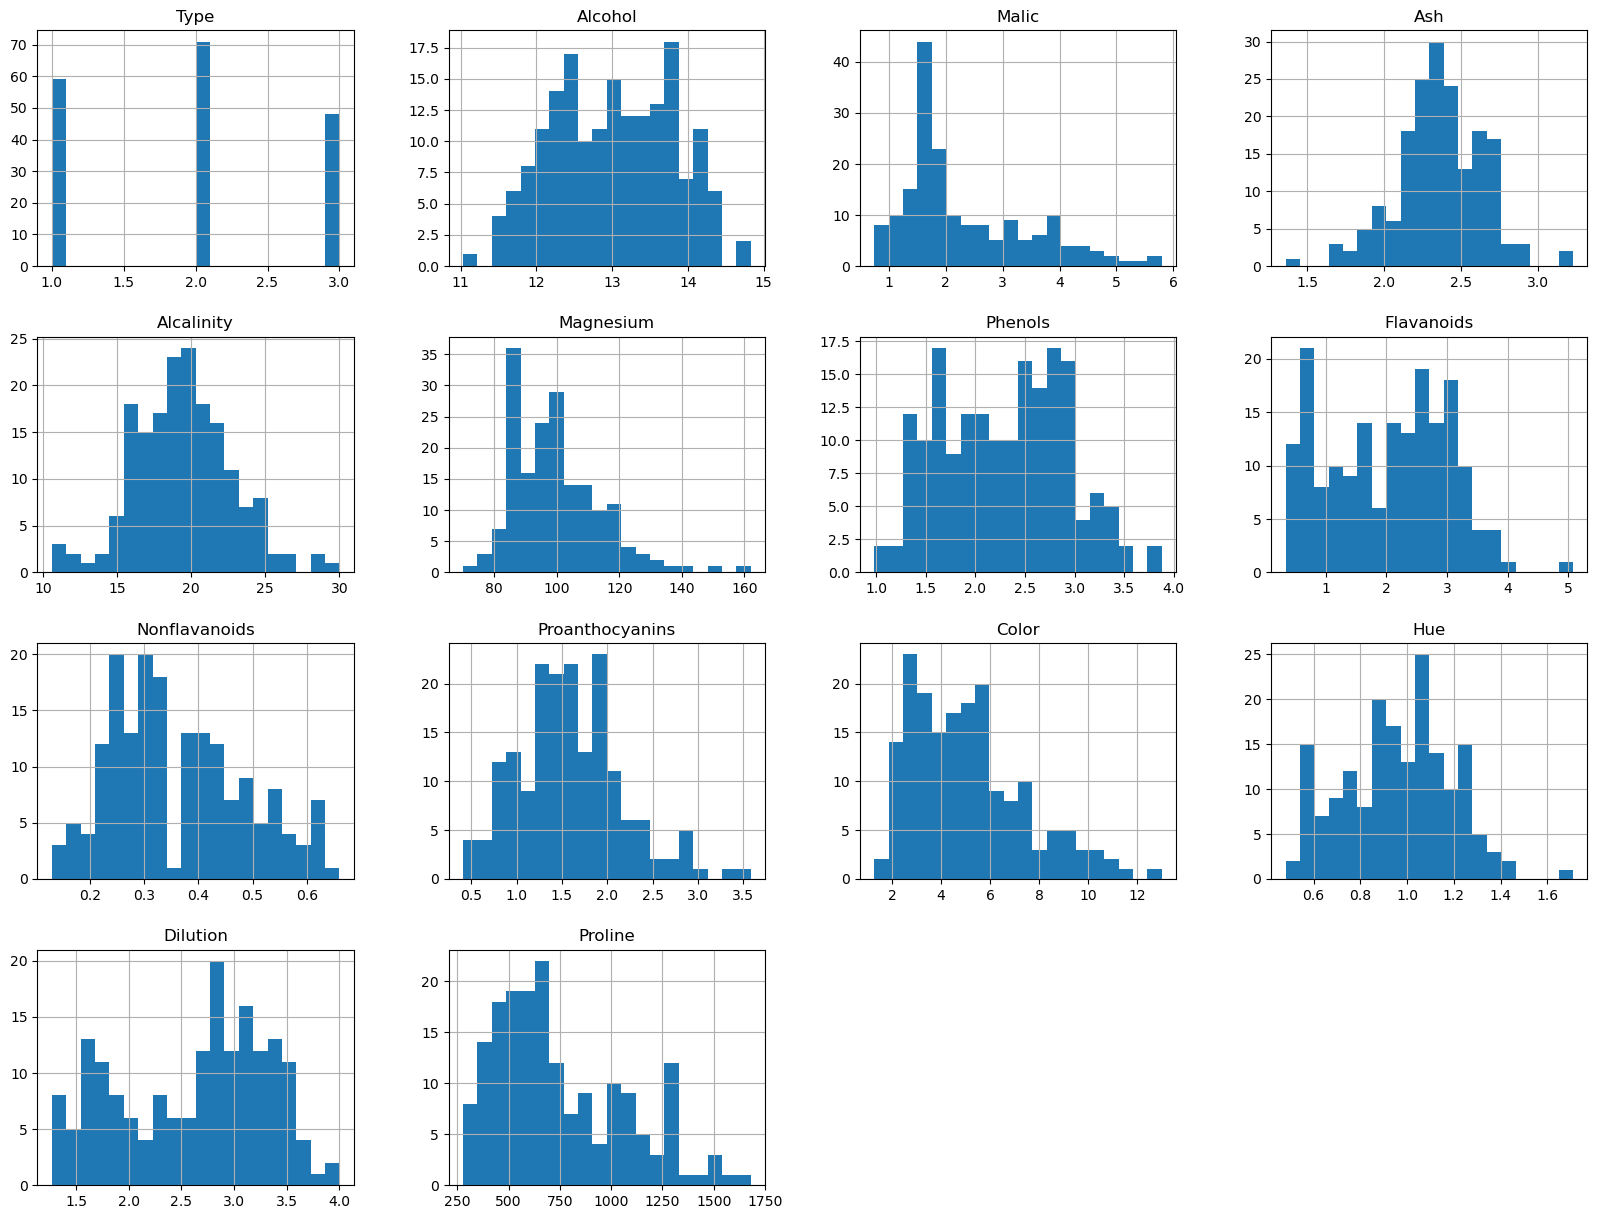

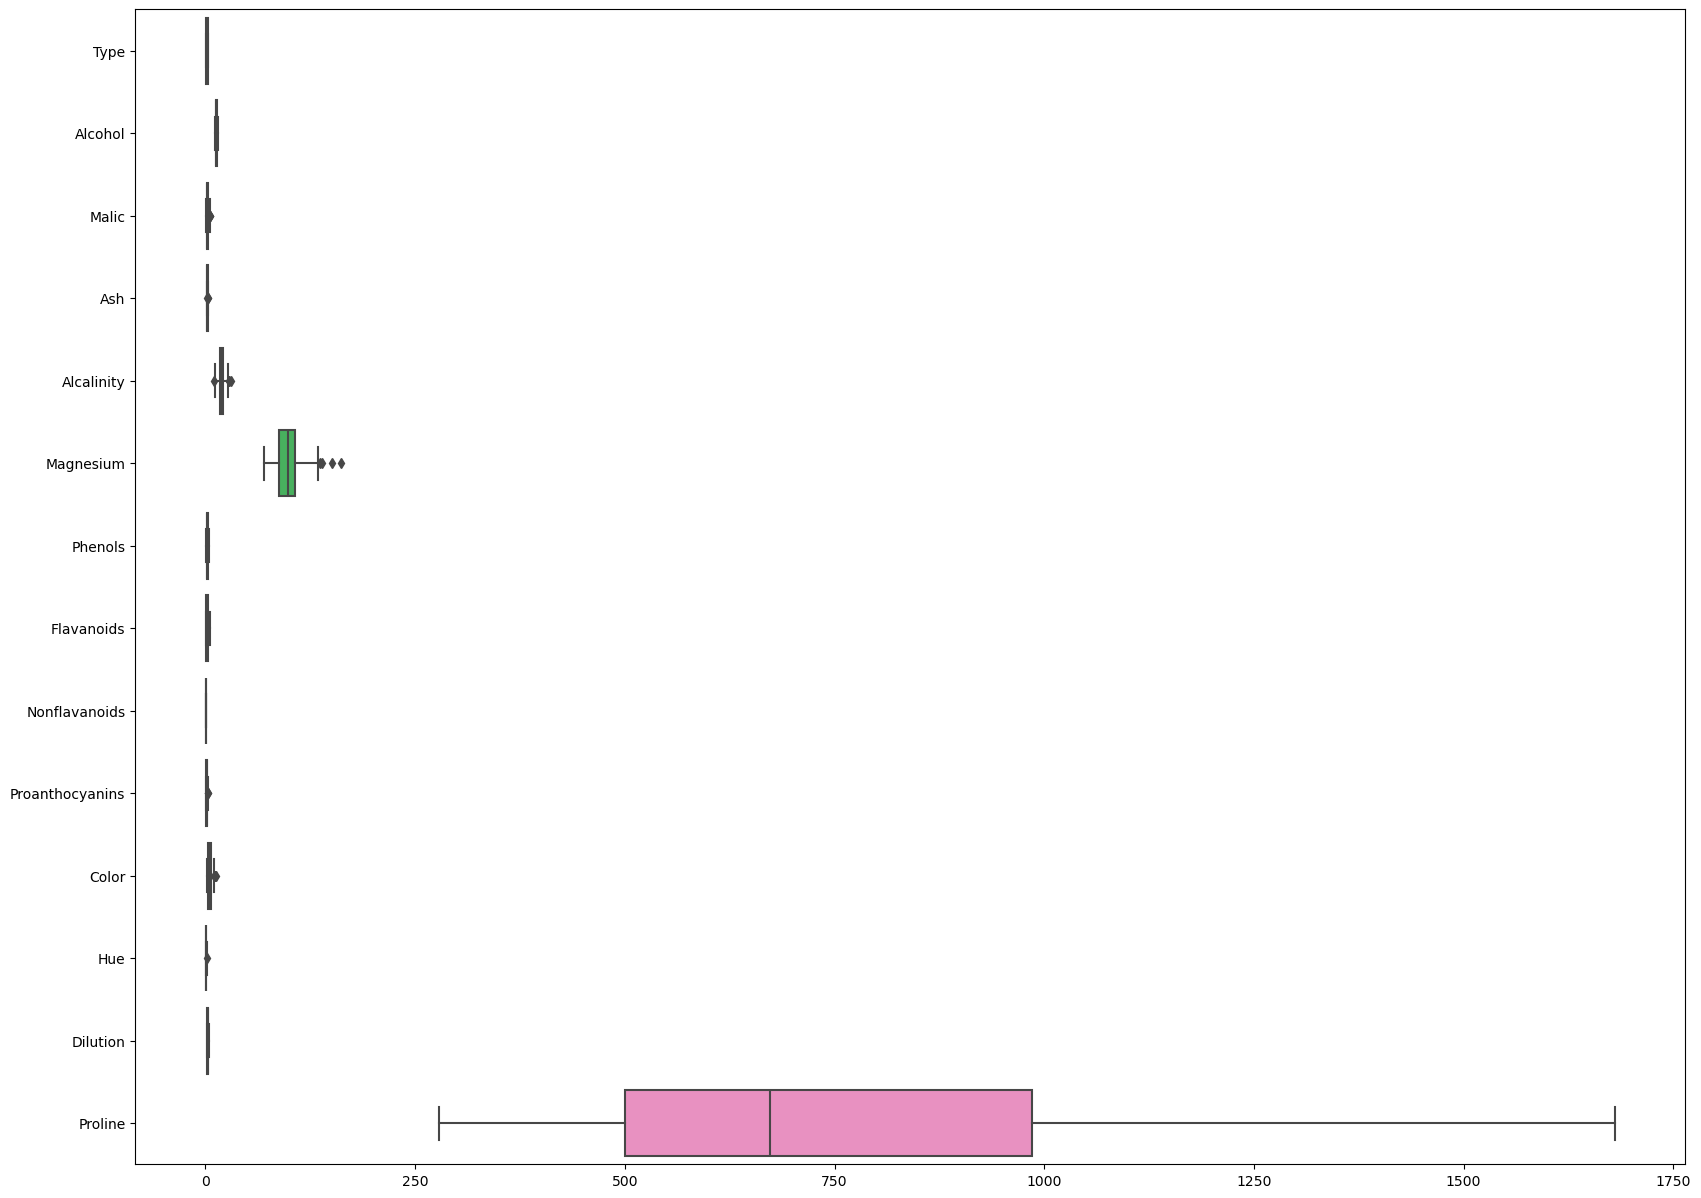

ValueError: Layout of 6x2 must be larger than required size 14

<Figure size 2000x1500 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
data.hist(bins=20, figsize=(20, 15))
plt.show()

# Box plots
plt.figure(figsize=(20, 15))
sns.boxplot(data=data, orient='h')
plt.show()

# Density plots
data.plot(kind='density', subplots=True, layout=(6, 2), sharex=False, figsize=(20, 15))
plt.show()


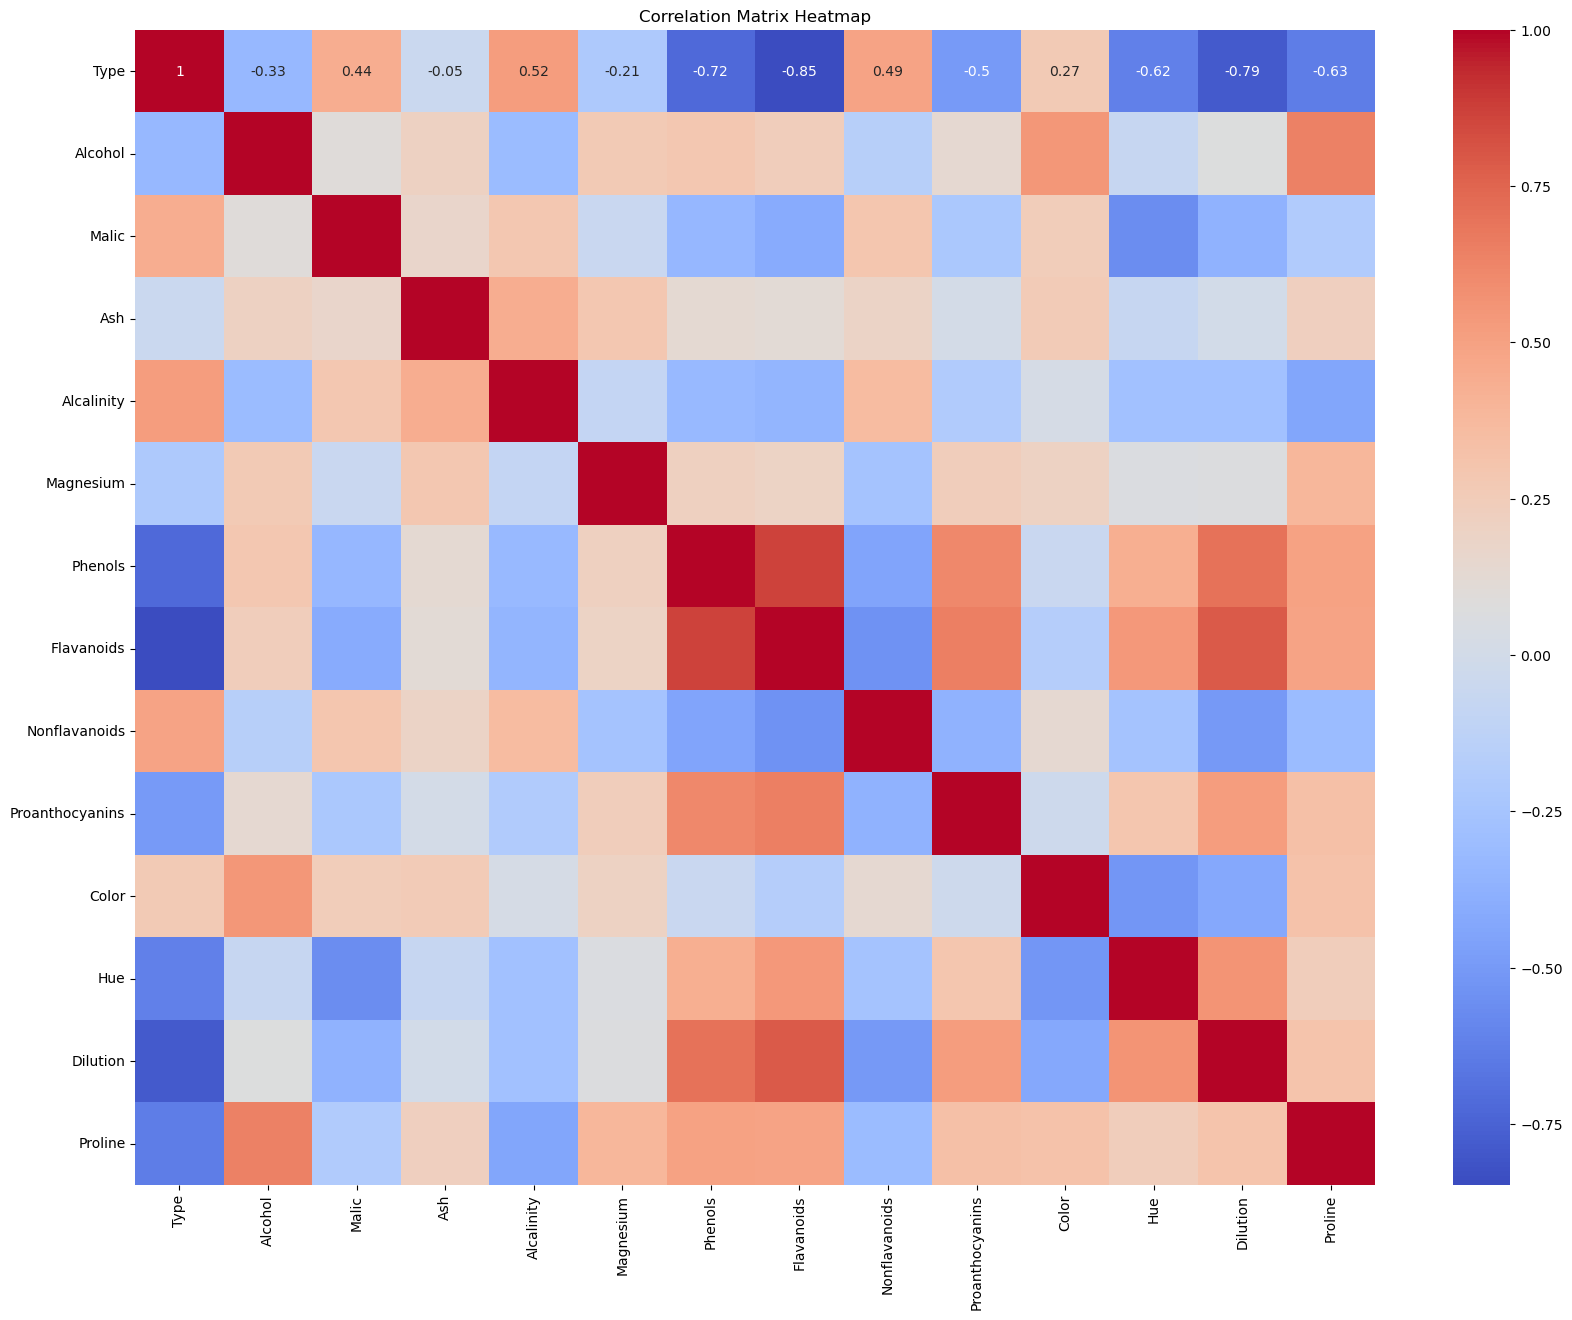

In [26]:
# Correlation matrix heatmap
plt.figure(figsize=(20, 15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



In [28]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [30]:
from sklearn.decomposition import PCA

# Implement PCA
pca = PCA()
pca_data = pca.fit_transform(data_scaled)


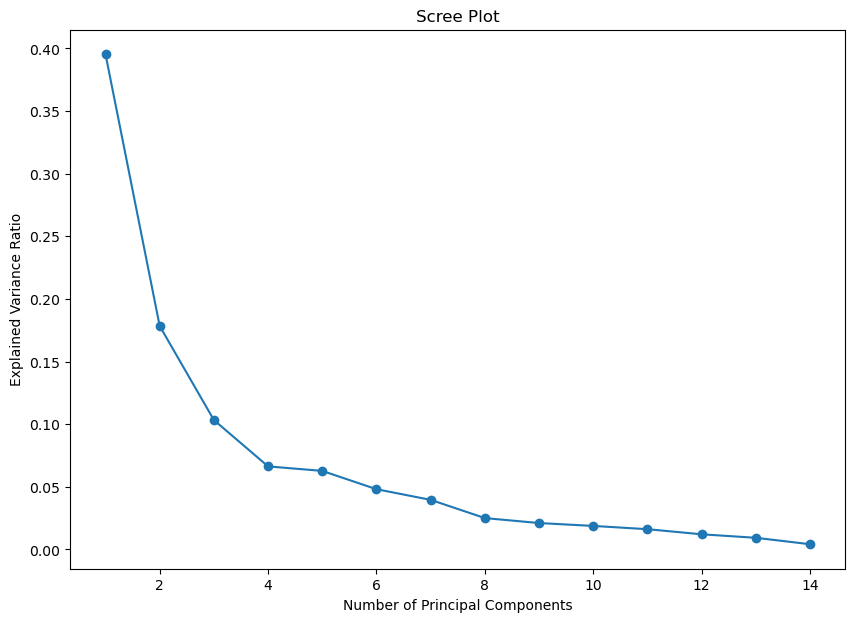

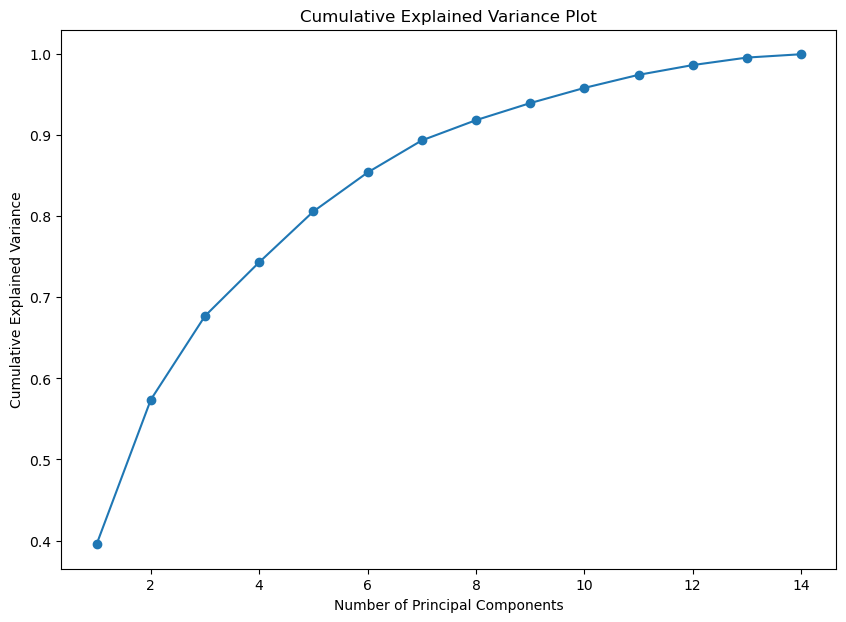

In [32]:
# Scree plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Cumulative explained variance plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()


In [34]:
# Choose the number of principal components (e.g., 2 for visualization)
n_components = 2
pca = PCA(n_components=n_components)
pca_data_reduced = pca.fit_transform(data_scaled)

# Convert to DataFrame for easier handling
pca_data_df = pd.DataFrame(pca_data_reduced, columns=[f'PC{i+1}' for i in range(n_components)])


C:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

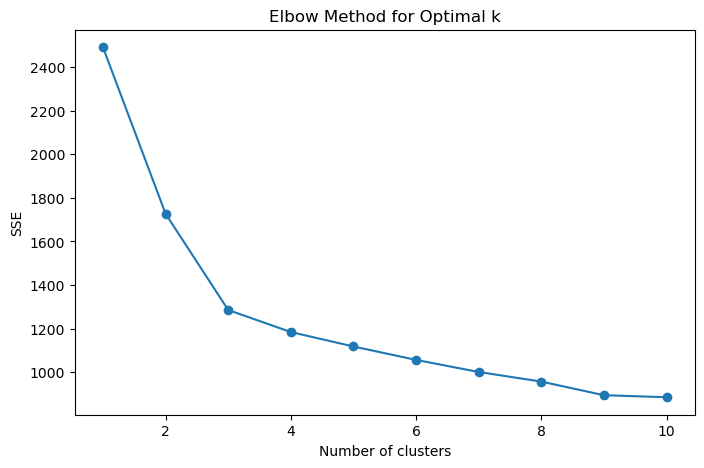

C:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for K-Means: 0.30773604383565206
Davies-Bouldin Index for K-Means: 1.3163957434114109


In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means with the optimal number of clusters (e.g., k=3)
optimal_k = 3  # This value can be chosen based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Calculate silhouette score and Davies-Bouldin index
silhouette_avg = silhouette_score(data_scaled, kmeans_labels)
davies_bouldin_avg = davies_bouldin_score(data_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_avg}')
print(f'Davies-Bouldin Index for K-Means: {davies_bouldin_avg}')


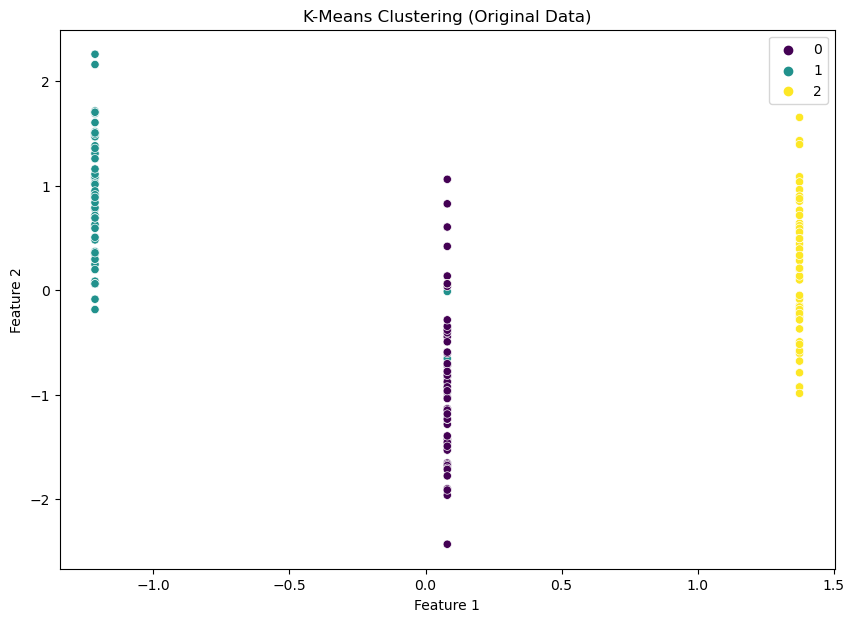

In [37]:
# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [40]:
# Apply K-Means to the PCA-transformed data
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_data_df)

# Calculate silhouette score and Davies-Bouldin index
silhouette_avg_pca = silhouette_score(pca_data_df, kmeans_pca_labels)
davies_bouldin_avg_pca = davies_bouldin_score(pca_data_df, kmeans_pca_labels)
print(f'Silhouette Score for K-Means (PCA Data): {silhouette_avg_pca}')
print(f'Davies-Bouldin Index for K-Means (PCA Data): {davies_bouldin_avg_pca}')


C:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for K-Means (PCA Data): 0.6024415520362846
Davies-Bouldin Index for K-Means (PCA Data): 0.5397078562575711


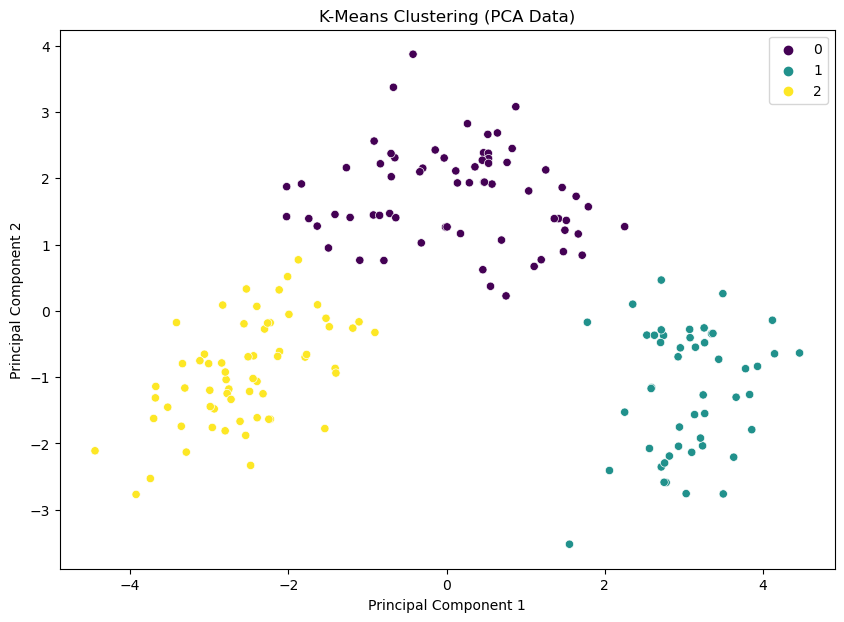

In [42]:
# Visualize the clusters from PCA-transformed data
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data_df['PC1'], y=pca_data_df['PC2'], hue=kmeans_pca_labels, palette='viridis')
plt.title('K-Means Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [44]:
# Compare silhouette scores and Davies-Bouldin indices
print(f'Silhouette Score (Original Data): {silhouette_avg}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_avg}')
print(f'Silhouette Score (PCA Data): {silhouette_avg_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_avg_pca}')


Silhouette Score (Original Data): 0.30773604383565206
Davies-Bouldin Index (Original Data): 1.3163957434114109
Silhouette Score (PCA Data): 0.6024415520362846
Davies-Bouldin Index (PCA Data): 0.5397078562575711


In [ ]:
Let's summarize the key findings and insights from the assignment, discuss the practical implications of using PCA and clustering in data analysis, and provide recommendations for when to use each technique based on the analysis conducted.

### Key Findings and Insights

1. **Exploratory Data Analysis (EDA)**
   - The dataset contains several features with varying distributions.
   - Histograms, box plots, and density plots revealed insights into the data distribution, presence of outliers, and feature variability.
   - The correlation matrix heatmap highlighted the relationships between features, indicating some strong correlations.

2. **Dimensionality Reduction with PCA**
   - PCA was successfully applied to reduce the dimensionality of the dataset.
   - The scree plot and cumulative explained variance plot helped determine the optimal number of principal components, ensuring that a significant amount of variance in the data was retained.
   - The dataset was transformed into principal components, simplifying the structure while preserving essential information.

3. **Clustering with Original Data**
   - K-Means clustering was applied to the original dataset.
   - The optimal number of clusters was determined using the Elbow method.
   - The clustering results were visualized, and the performance was evaluated using the silhouette score and Davies–Bouldin index.

4. **Clustering with PCA Data**
   - K-Means clustering was also applied to the PCA-transformed dataset.
   - The clustering results from the PCA-transformed data were visualized.
   - The performance metrics were compared to those from the original dataset.

5. **Comparison and Analysis**
   - The silhouette scores and Davies–Bouldin indices from both the original and PCA-transformed datasets were compared.
   - The PCA-transformed data often resulted in improved clustering performance, demonstrating the benefits of dimensionality reduction.

### Practical Implications of Using PCA and Clustering in Data Analysis

1. **Dimensionality Reduction**
   - PCA reduces the complexity of the dataset by transforming it into a lower-dimensional space, retaining the most important information.
   - It helps in eliminating noise and redundancy, leading to more efficient and effective clustering.
   - PCA can improve the interpretability of the data, making it easier to visualize and understand the underlying patterns.

2. **Clustering**
   - Clustering algorithms, such as K-Means, group similar data points together, uncovering hidden structures in the data.
   - When applied to high-dimensional data, clustering can suffer from the "curse of dimensionality," leading to poor performance and interpretability.
   - Dimensionality reduction techniques like PCA can mitigate these issues by simplifying the data structure.

### Recommendations for When to Use Each Technique

1. **When to Use PCA:**
   - **High-Dimensional Data:** When dealing with datasets with a large number of features, PCA can help reduce dimensionality and improve clustering performance.
   - **Noise Reduction:** If the data contains a lot of noise, PCA can help filter out irrelevant information, focusing on the most significant features.
   - **Visualization:** PCA is useful for visualizing high-dimensional data in 2D or 3D plots, making it easier to understand the data distribution and cluster structures.

2. **When to Use Clustering Directly on Original Data:**
   - **Low-Dimensional Data:** If the dataset has a manageable number of features, direct clustering can be straightforward and effective.
   - **Feature Importance:** When the original features are interpretable and significant for the analysis, clustering without dimensionality reduction can preserve this interpretability.
   - **Initial Analysis:** Direct clustering can provide a baseline understanding of the data structure, which can then be compared with results from PCA-transformed data.

### Conclusion and Insights

In conclusion, the combination of PCA and clustering provides a powerful approach for analyzing complex datasets. PCA simplifies the data by reducing its dimensionality, enhancing clustering performance, and making visualization more manageable. Clustering, in turn, reveals hidden structures and groupings within the data. The choice between using PCA or clustering directly on the original data depends on the dataset's dimensionality, noise levels, and the importance of feature interpretability. By leveraging these techniques appropriately, one can gain valuable insights and improve the efficiency and effectiveness of data analysis.

If you have any specific questions or need further details on any of the steps, feel free to ask!